In [1]:
#!pip install gensim
#!pip install pyenchant
#!pip install wordcloud matplotlib
#!pip install Pillow==9.5.0



In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec



C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\user\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Load the data (replace with your CSV file path)
data = pd.read_csv('dailykos.csv') 



In [4]:
data.head()

,Document,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [5]:
# Assuming word counts are the features, we'll work with this directly
X = data.drop('Document', axis=1)  # Replace if you have a label column

In [6]:
X.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


# Q1
עליכם לחלק את הדאטה לאשכולות על פי שני אלגוריתמים – האלגוריתם ההיררכי ואלגוריתם קיי מינס  

In [7]:
# k-means clustering
n_clusters_list = [2, 3, 7, 8]  # Number of clusters to try
sse_values = [] #in order to find an elbow with graph
silhouette_values = [] #in order to see when i have the highst value
for n_clusters in n_clusters_list:
    km_model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    km_labels = km_model.fit_predict(X)

    sse = km_model.inertia_  # Sum of squared errors
    sse_values.append(sse)
    silhouette_avg = silhouette_score(X, km_labels) 
    silhouette_values.append(silhouette_avg)
    print(f"k-means with {n_clusters} clusters:")
    print(f"SSE: {sse}")
    print(f"Silhouette Score: {silhouette_avg}")

k-means with 2 clusters:
SSE: 817799.8968688027
Silhouette Score: 0.2517539604671334
k-means with 3 clusters:
SSE: 786335.2794745789
Silhouette Score: 0.23217342951613681
k-means with 7 clusters:
SSE: 729795.0638187751
Silhouette Score: 0.1470318917434851
k-means with 8 clusters:
SSE: 722880.7035035788
Silhouette Score: 0.0783311212786348


In [8]:
# Hierarchical clustering
linkage_types = ['ward', 'complete', 'average', 'single']
all_scores = []
for n_clusters in n_clusters_list:
    for linkage in linkage_types:
        hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        hc_labels = hc_model.fit_predict(X)
        # Calculate individual silhouette scores
        silhouette_scores = silhouette_score(X, hc_labels)
        all_scores.append((n_clusters, linkage, silhouette_scores))
    


In [9]:
df_Hierarchical_clustering = pd.DataFrame(all_scores, columns=["n_clusters","Linkage", "Silhouette Scores"])

In [10]:
# חישוב ממוצע Silhouette Scores עבור כל ערך של n_clusters
average_scores = df_Hierarchical_clustering.groupby("n_clusters")["Silhouette Scores"].mean()
df_Hierarchical_clustering["Silhouette AVG"] = df_Hierarchical_clustering["n_clusters"].apply(lambda x: average_scores[x])
df_Hierarchical_clustering.to_csv("silhouette_scores.csv", index=False)

In [11]:
average_scores

n_clusters
2    0.588993
3    0.513746
7    0.443121
8    0.429737
Name: Silhouette Scores, dtype: float64

In [12]:
df_Hierarchical_clustering

,n_clusters,Linkage,Silhouette Scores,Silhouette AVG
0,2,ward,0.229865,0.588993
1,2,complete,0.708702,0.588993
2,2,average,0.708702,0.588993
3,2,single,0.708702,0.588993
4,3,ward,0.223033,0.513746
5,3,complete,0.539376,0.513746
6,3,average,0.649739,0.513746
7,3,single,0.642836,0.513746
8,7,ward,0.071024,0.443121
9,7,complete,0.527065,0.443121


# K-means

# Q2

חלקו את הדאטה ל2,3,7,8 אשכולות והציגו את איכות החלוקה על פי הקריטריונים שנלמדו בהרצאה בכיתה
(SSE,silhouette)

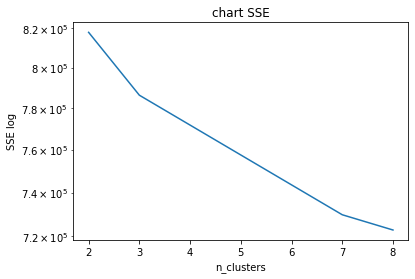

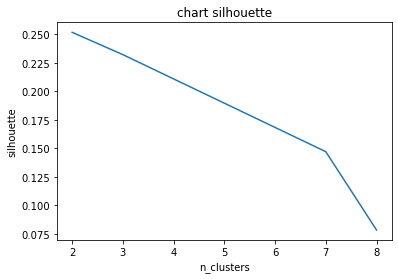

In [13]:
plt.plot(n_clusters_list, sse_values)
plt.xlabel("n_clusters")
plt.ylabel("SSE log")
plt.yscale("log")
plt.title("chart SSE")
plt.show()



plt.plot(n_clusters_list, silhouette_values)
plt.xlabel("n_clusters")
plt.ylabel("silhouette")
plt.title("chart silhouette")
plt.show()


# Q3 
בחרו את מספר האשכולות האופטימלי מבחינתכם, הסבירו למה בחרתם ערך זה 

## תשובה

אין מרפק ברור עבור איזה שהוא מספר. ניתן לראות 2 מרפקים קטנים ב3 וב7. מכיוון שהערך של סלהוט יורד משמעותית עבור כל מספר אבחר ב3.
הוא נותן לי ירידה במדד אס-אס-אי שיירד ככל שנגדיל את מספר האשכולות. וגם מכיל ערך גבוה של סלהוט 

באופן כללי לפי התוצאות אוכל לראות שלמודל זה אין תוצאות טובות ואצטרך למצוא דרך אחרת לחלק את הדאטה שלי לאשכולות.

In [14]:
# Choose the optimal number of clusters based on evaluation
optimal_n_clusters = 3 
#fit tge data to model with 3 clusters
km_model = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=42)
km_labels = km_model.fit_predict(X)

# Q4
 לאיזה אשכול יש את המספר המקסימלי של דוגמאות ולאיזה יש את המספר המינימלי מהו המספר 


In [15]:
# Find cluster sizes
_, cluster_counts = np.unique(km_labels, return_counts=True)  # Assuming you picked k-means 
max_cluster_idx = np.argmax(cluster_counts)
min_cluster_idx = np.argmin(cluster_counts)


In [16]:
print("the cluster with max examples is:",max_cluster_idx)
print("the cluster with min examples is:",min_cluster_idx)


the cluster with max examples is: 2
the cluster with min examples is: 0


# Q5
צרו קובץ סי-אס-וי המכיל את הנתונים השייכים לכל אשכול בנפרד 


In [17]:
# Create separate CSV files
for i in range(optimal_n_clusters):
    cluster_data = data[km_labels == i]
    cluster_data.to_csv(f'cluster_{i}.csv', index=False)

# Q6
הסתכלו על הקבצים השונים ונסו להבין לאיזה נושא כל אחד מתייחס, תעדו בתשובה מה הערכים שגרמו
לכם להגיע למסקנה 

In [18]:
c_0 = pd.read_csv('cluster_0.csv')
c_0 = c_0.drop('Document', axis=1)
c_1 = pd.read_csv('cluster_1.csv')
c_1 = c_1.drop('Document', axis=1)
c_2 = pd.read_csv('cluster_2.csv') 
c_2 = c_2.drop('Document', axis=1)


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

def calculate_tf_idf(dataframe):
    # משנה את מבנה המילים כך שכל מילה תהיה באותיות קטנות
    dataframe = dataframe.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    
    # משכפל מספר המסמכים באורך השורה כדי לקבל את ערך TF
    tf = dataframe.apply(lambda x: x / np.sum(x), axis=1)
    
    # יצירת מודל IDF
    idf_model = TfidfTransformer()
    idf_model.fit(tf)
    
    # חישוב TF-IDF
    tf_idf_matrix = idf_model.transform(tf)
    
    # יצירת DataFrame עם התוצאות
    tf_idf_df = pd.DataFrame(tf_idf_matrix.toarray(), columns=dataframe.columns)
    
    return tf_idf_df

In [20]:
#פונקציה שממירה את ציוני TF-IDF למילון
def dict_of_tf_idf(df):
    tfidf=calculate_tf_idf(df)
    tfidf = tfidf.apply(lambda x: int(sum(x)*100), axis=0)
    tfidf = tfidf.sort_values(ascending=False)
    tfidf = tfidf.to_dict()
    return tfidf
    


In [21]:
#פונקציה לבידוד מילים לא רלוונטיות לפיthreshold 
def find_irrelevant_words_in_dict(tfidf_scores, tfidf_threshold=0.1):
    irrelevant_words = []
    for word, score in tfidf_scores.items():
        if score < tfidf_threshold:
            irrelevant_words.append(word)

    return irrelevant_words

In [22]:
#יצירת מילונים עם ציוני TF-IDF עבור כל קלאסטר
lst_df=[c_0,c_1,c_2]
lst_dic_cluster= []
irrelevant_words_lst=[]
for i in range(len(lst_df)):
    lst_dic_cluster.append(dict_of_tf_idf(lst_df[i]))
    irrelevant_words_lst.append(find_irrelevant_words_in_dict(lst_dic_cluster[i]))

the word cloud for cluster 0 is:


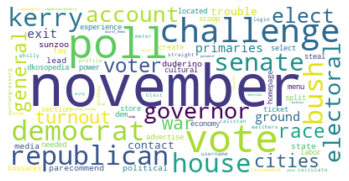

the word cloud for cluster 1 is:


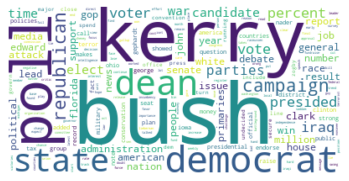

the word cloud for cluster 2 is:


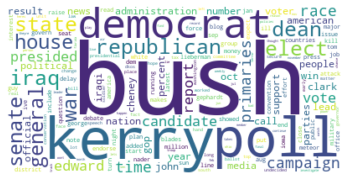

In [23]:
from wordcloud import WordCloud
# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,background_color='white')
# generate the word cloud
for df in range(len(lst_df)):
    wordcloud.generate_from_frequencies(dict_of_tf_idf(lst_df[df]))
    print("the word cloud for cluster",df,"is:")
    #plot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

אפילו שעשיתי סינון למילים רלוונטיות בכל אשכול עדיין קשה להבין במה עוסק האשכול. גם שממחשים את זה בצורה יפה. אנסה לפלטר מילים לא רלוונטיות ולהציג מחדש את המילים המרכזיות. כדי לחקור את המילים שאוריד אותן אדפיס אותן וסתכל אם אוכל להוציא מזה תובנות.

In [24]:
#פונקציה שמוצאת מילים בעייתיות(אין התחשבות בסטופ וורדס כי היה נתון שכבר טיפלו בזה)
import enchant
def filter_bad_words(word_list):
    bad_words=[]
    d = enchant.Dict("en_US")  # English dictionary
    for word in word_list:
        if not d.check(word):  # Check against dictionary
            bad_words.append(word)
        if len(word) < 3:  # Filter short words
            bad_words.append(word)
    return bad_words

נבדוק את המילים החריגות בכל קלאסטר. זה יכול לתת לנו תובנות על הנושא של הקלאסטר ואם לא ננקה אותן ונבדוק עם וורד2ואק

In [25]:
def process_document(words_lst,i):# פונקציה שמוריד מילים רעות מהמילים שקיימות בקלאסטר ומדפיס מילים רעות
    all_words = words_lst.keys()
    bad_words = filter_bad_words(all_words)
    print(f"the bad words in cluster {i}:\n{bad_words}\n\n")
    return {key: value for key, value in lst_dic_cluster[i].items() if key not in bad_words}

In [26]:
filtered_words_lst=[]
for i in range(optimal_n_clusters):
    lst_dic_cluster[i] = process_document(lst_dic_cluster[i],i)


the bad words in cluster 0:
['november', 'kerry', 'parecommend', 'duderino', 'sunzoo', 'dem', 'dkosopedia', 'kossacks', 'faq', 'ourcongressorg', 'philly', 'calistan', 'boxfeed_listing', 'endspan', 'boxblogroll', 'bushsux', 'republicansforkerry', 'newwindow', 'montclair', 'boxrdf_feeds', 'racine', 'dryfly', 'openhttpwwwedwardsforprezcomdailykoshtml', 'startspan', 'altsite', 'qaqaa', 'hstewart', 'nov', 'zogby', 'christopher', 'liberalrakkasan', 'idetestthispres', 'hotshotxi', 'barbero', 'mich', 'virginiadem', 'bloomfield', 'edward', 'misterajc', 'tradesports', 'iraq', 'ohio', 'direwolf', 'carolina', 'katerina', 'cnn', 'kingelection', 'gatana', 'juppon', 'san', 'lawnorder', 'nader', 'francisco', 'drfranklives', 'punkmonk', 'danielua', 'chedrcheez', 'lzmd', 'wclathe', 'cfr', 'repub', 'atlanta', 'bradnickel', 'clark', 'vaantirepublican', 'gop', 'senategovernors', 'jiacinto', 'upenn', 'lud', 'nro', 'nprigo', 'egon', 'dday', 'american', 'cia', 'seamus', 'iowa', 'iraqi', 'cheney', 'sep', 'wash

the word cloud for cluster 0 is:


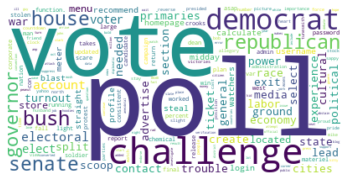

the word cloud for cluster 1 is:


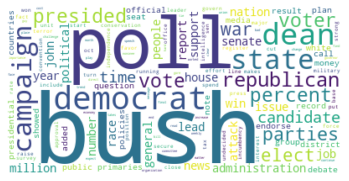

the word cloud for cluster 2 is:


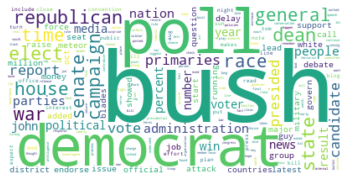

In [27]:
from wordcloud import WordCloud
# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,background_color='white')
# generate the word cloud
for i in range(len(lst_dic_cluster)):
    wordcloud.generate_from_frequencies(lst_dic_cluster[i])
    print("the word cloud for cluster",i,"is:")
    #plot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

the white house for cluster 0 is:


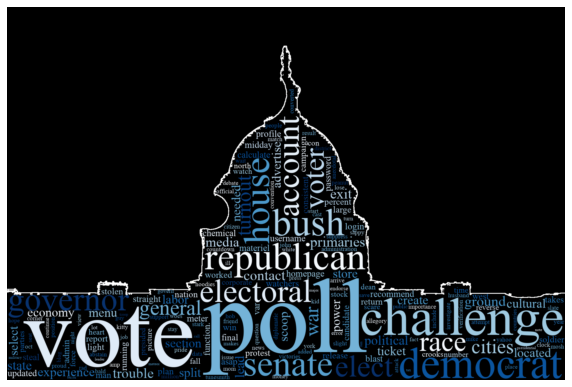

the white house for cluster 1 is:


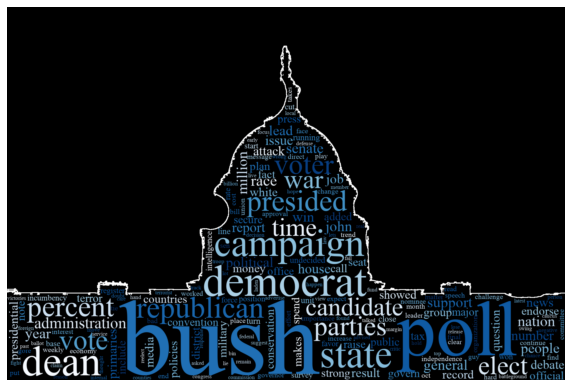

the white house for cluster 2 is:


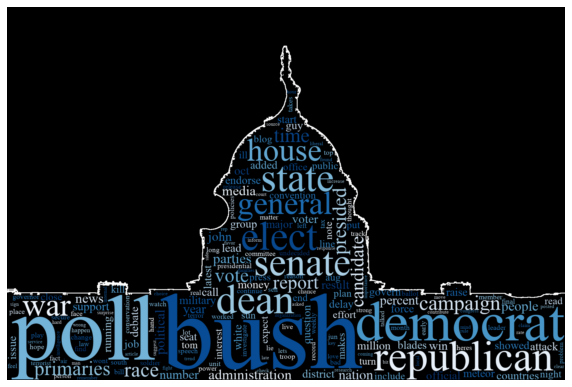

In [28]:
#present the result on thewhite house :)
import matplotlib as mpl
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('cenat_b_w.jpg'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
# generate the word cloud
for i in range(len(lst_dic_cluster)):
    wordcloud = WordCloud(font_path= 'C:/Windows/Fonts/david.ttf',
                      width=1000,
                      height=800,
                      background_color='black',
                      contour_color='white',
                      mask=cand_mask, 
                      colormap='Blues',
                      contour_width=4).generate_from_frequencies(lst_dic_cluster[i])
    print("the white house for cluster",i,"is:")
    #plot
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


כפי שניתן לראות עבור הקלאסטר הראשון(קלאסטר 0) המילים "הרעות" נותנות לנו תובנות מעניינות. ניתן להבחין ב2 מילים שמספקות הקשר לקלאסטר:
'bushsux'
'republicansforkerry'
כנראה שהקלאסטר הזה עוסק בתומכים של קרי המועמד הרפובליקני.


לדעתי הקלאסטר השני עוסק בתומכי בוש. ניתן לראות שהמילים החזקות שם הם דמוקרטיה

לדעתי הקלאסטר השלישי עוסק בעיקר במלחמה. ניתן להבחין במילים מודגשות שקשורות לבוש אך גם המילה מלחמה מודגש מאוד 

In [29]:
# פונקציה למציאת מילים דומות לפי דמיון קוסינוס 
def find_similar_cos(model,word, topn=5,threshold=0.8):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        filtered_results = [word for word, sim in similar_words if sim >= threshold]
        return filtered_results
    except KeyError:
        return f"{word} not found in vocabulary"

In [30]:
#פונקציה למציאת דמיון
def find_similar(model,word, topn=5):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return f"{word} not found in vocabulary"

In [ ]:
#פונקציה שמקבלת מילון ומחזירה מילון מצומצם יותר רק עם מילים שלא דומות אחת לשנייה.

def find_similar_words(word_scores_dict, model_path=model_path, threshold=0.5):
    
    # Load pre-trained Word2Vec model
    model = Word2Vec.load(model_path)

    # Dictionary to store similar words
    similar_words_dict = {}

    # Iterate over words in the input dictionary
    for word in word_scores_dict.keys():
        # Initialize list to store similar words
        similar_words = []

        # Check if word exists in the Word2Vec model's vocabulary
        if word in model.wv.vocab:
            # Find similar words using the Word2Vec model
            similar_word_tuples = model.wv.most_similar(word, topn=None)

            # Filter similar words based on the threshold
            for similar_word, similarity_score in similar_word_tuples:
                if similarity_score > threshold:
                    similar_words.append(similar_word)

        # Store the list of similar words in the output dictionary
        similar_words_dict[word] = similar_words

    return similar_words_dict

In [ ]:
tester=find_similar_words(lst_dic_cluster[0])

In [ ]:
tester

# AgglomerativeClustering

# Q7
בצעו סיווג על פי ארבעת ערכי הlinkage בספרייה. השוו את הדנדוגרמים שאתם מקבלים. 

In [ ]:
df_Hierarchical_clustering

ניתן לראות שחלוקה ל2 אשכולות היא העדיפה ביותר לפי שיטה זאת